# MATH 360 Problem Set 3a

## Stochastic Models

In [1]:
#import packages
import numpy as np
import matplotlib.pyplot as plt
import random
from scipy.stats import norm
import scipy.stats as stats
%matplotlib inline


print("packages imported")

packages imported


## Montel Carlo Exercises

The following problems centre around coding a monte carlo method to solve a specific problem.

### Calculation of $\pi$ using Monte Carlo
Use Monte Carlo to calculate $\pi$. To do this, use the following framework:
1. Create a square on the interval $[-1,1] \times [-1,1]$ and inscribe a circle with radius 1 inside.
2. Uniformly scatter a chosen number of points over the entire square. 
3. Count the number of points inside the circle.
4. Compute the ratio of the points inside to the total number of points distributed.
5. Multiply the result of step 4 by 4 to estimate $\pi$.

*This methodology is from Monte Carlo Methods by Malvin Kalos and Paula Witlock*

In [2]:
num_pts = 100000

pts_inside = [] #initials pts matrix
pts_outside = [] #initial pts matrix

for i in range(num_pts):
    x_pts = np.random.uniform(-1,1) #randomly assign x-coordinate from uniform distribution
    y_pts = np.random.uniform(-1,1) #randomly assign y-coordinate from uniform distribution 
    if x_pts**2 + y_pts**2 <1: #for points inside the circle
        pts_inside.append((x_pts,y_pts)) #store pts 
    else: 
        pts_outside.append((x_pts,y_pts))
        
answer = 4*len(pts_inside)/num_pts #calculation of pi

answer

3.14292

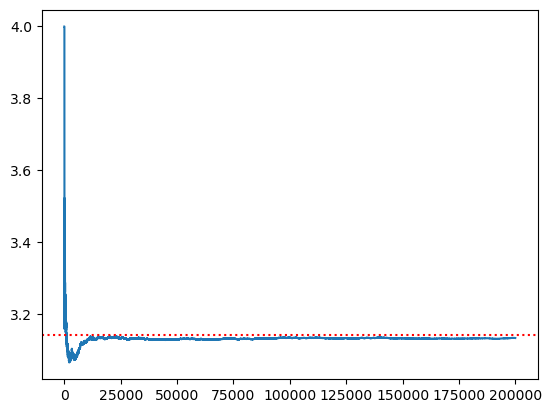

In [3]:
# Let's make a plot of the convergence to pi as we increase the number of pts distributed

num_pts_con = 200000
pts_inside_con = 0 # starting value
pi_approx = []
iter_num = []
error = []

for i in range(num_pts_con):
    x_pts = np.random.uniform(-1,1) #randomly assign x-coordinate from uniform distribution
    y_pts = np.random.uniform(-1,1) #randomly assign y-coordinate from uniform distribution 
    if (x_pts**2 + y_pts**2) <1: #for points inside the circle
           pts_inside_con += 1 #counter for number of pts inside
    pi_approx.append(4 * pts_inside_con/(i+1))#pi approx calculation 
    iter_num.append(i)
    error.append(4 * pts_inside_con/(i+1) - np.pi) # calculate differene between approximation and exact value


plt.plot(iter_num,pi_approx)
#exact value
plt.axhline(y=np.pi, color='r', linestyle=':')
plt.show()

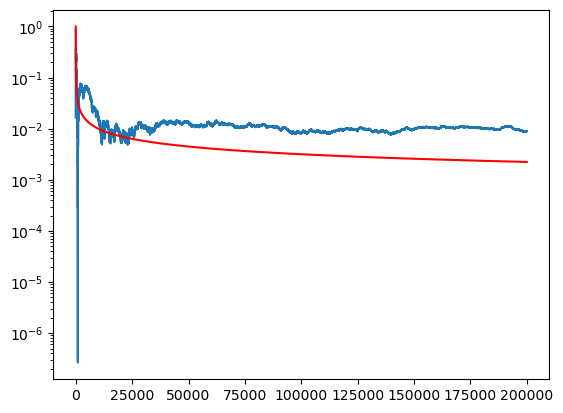

In [4]:
### can also plot the error to see the accuracy
plt.semilogy(iter_num,np.abs(error))
#we know MC simulations converge as 1/sqrt(n), so plot this line as well
plt.semilogy(iter_num,1/np.sqrt(np.arange(num_pts_con)+1), color="r") #need +1 because indexing from 0, so need to count total
plt.show()

### Why does this work?

This comes down to the ratio that we are computing.  We have a square with side lengths of 2 and a circle of radius one. The area of the square is 
\begin{align*}
A  &= s^2\bigg|_{s=2}\\
& = 2^2\\
& = 4,
\end{align*}
and circle is  
\begin{align*}
A  &= \pi r^2\bigg|_{r=1}\\
& = \pi (1)^2\\
& = \pi.
\end{align*}

The radio of the areas is then:
\begin{align*}
\textrm{ratio} & = \frac{A_{circle}}{A_{square}}\\
& = \frac{\pi}{4}\\
\implies \pi &= 4 \cdot \textrm{ratio}
\end{align*}

### Monte Carlo Integration

Recall the average value of a function formula: $$\bar{f}(x) = \frac{1}{b-a} \int\limits_a^b f(x) dx.$$  We are implementing integration using a numerical method.  We can rearrange this formula to get an exact definition $$ \int\limits_a^b f(x) dx = (b-a)\bar{f}(x).$$

To numerically compute the integral, we will be taking our function $f(x)$ and evaluating it over a uniform grid of $x$ points, say $x_i$.  If we take the limit of the space between $x_i$ and $x_{i+1}$ to zero, we would end up with our exact integral.  However, when working with numerical schemes, we have a discrete number of $x_i$.  

Going back to our formulation, we can calculate the average of the $f(x_i)$'s to approximate the integral: $$ \int\limits_a^b f(x) dx \approx (b-a) \left(\frac{1}{N} \sum\limits_{i=1}^{N} f(x_i) \right).$$

If we take $N$ big enough, by the Law of Large Numbers, our estimate of $$(b-a) \left(\frac{1}{N} \sum\limits_{i=1}^{N} f(x_i)\right)$$ will converge to $$(b-a)\bar{f}(x),$$ which we know by the average value formula is equal to $\int\limits_a^b f(x) dx$.

Set up a Monte Carlo framework compute the integral $\int\limits_0^{\pi} x\sin(x) \, dx$ and then compare your result to the exact value of $\int\limits_0^{\pi} x\sin(x) \, dx = \pi.$

**Remark:** For small dimensional integrals (e.g., $d=1, d=2, d=3$) we have some good quadrature methods to solve integrals.  However, as the dimension of the integrand increases, these methods become more and more computational expensive to implement.  The convergence rate of quadrature algorithms goes as $N^d$.  So as $d$ increases, we need more and more sample points to achieve a good accuracy. In other words, as we increase the number of points in the region by creating a finer grid spacing, the error does not decrease at the same rate. For higher dimensional integrals, the technique of Monte Carlo Integration is used, because the error has a constant decrease of $\mathcal{O}\left( \frac{1}{\sqrt{N}} \right).$

In [5]:
#integration limits
a = 0
b = np.pi

#number of points
num = 3000

#sample random number of x points
x_pts = np.random.uniform(a,b,num)

# define function
def MC_fun(x):
    return x * np.sin(x)

# Implement MC integration
integral = 0

for i in range(num):
    integral += MC_fun(x_pts[i]) ## in each iteration add the function evaluated at x_pts(i) to the integral value
    
solution = (b-a)/num * integral

solution

3.1226052770535833

Notice how if we run the calculation again, we get a different value.  Some times we will overshoot the value of $\pi$ and other times we will undershoot. Each time we run the block, we are choosing different x_pts to evaluate the function at. 

One thing we can do, is find the value of this integral multiple times and then plot the distribution of solution values. 

In [6]:
# initialize vector of integal values

num = 4000

solution_MC = []

for i in range(num):
    x_pts_MC = np.random.uniform(a,b,num) #create random x pts 
    integral_2 = 0 # initial integral value
    
    for i in range(num):
        integral_2 += MC_fun(x_pts_MC[i]) ## in each iteration add the function evaluated at x_pts(i) to the integral value

    #compute integral  
    solution_2 = 1/float(num) * integral_2 * (b-a)
    solution_MC.append(solution_2)

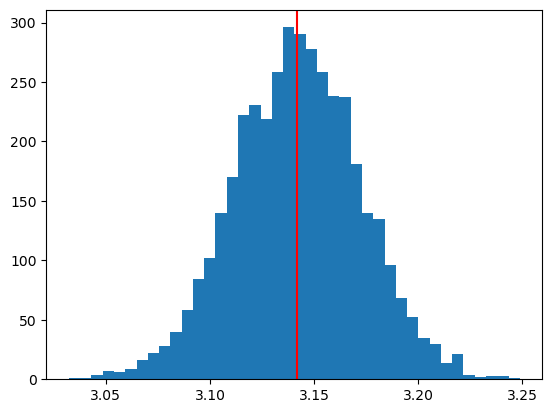

In [7]:
plt.hist(solution_MC, bins = 40) 
plt.axvline(x = np.pi, color = 'r') #vertical line for exact value
plt.show()

In [8]:
## The value of the integral is then the average of all of our Monte Carlo integrations
np.mean(solution_MC)

3.141933810604147

**Remark:** This looks like a normal distribution where the peak is around $\pi$.  If we added more sample points, we would see that the distribution would smooth out and have the peak at $\pi$. 

## Probability Distribution Problems

For each problem below, construct a mathematical model using the 6 step modelling process.  Be sure to **explicitly** indicate each step of the proccess.

### Switchboard calls

Suppose that telephone calls arriving at a particular switchboard follow an exponential distribution, with an average of $5$ calls per minute. Further suppose that calls are transferred to their destination by the switchboard following a uniform distribution spanning $30$ seconds to $50$ seconds.  

Construct a mathematical model to model the total call time from when a call enters the switchboard to when it is transferred to its destination. Then form the probability distribution function using Kernel Density Estimation.

Be sure to follow the modelling process in your solution. 

**Step 1: State the problem** 

Determine the probability distribution of the total call time from when a call enters the switchboard to when it is transferred.

**Step 2: Variables and Parameters**

Random variables
- $X_1$: Number of incoming calls
- $X_2$: Time to transfer a call 

Parameters:
- $\mu_1$: Average number of calls coming in
- $\mu_2 = \frac{30+50}{2} = 40$: Average time for to transfer call
- $\sigma_2^2 = \frac{20^2}{12} = \frac{100}{3}$: Variance for time to transfer call 

**Step 3: Assumptions and Variables**
- Random variable $X_1$ is exponentially distributed
- Random variable $X_2$ is uniformlly distributed.

**Step 4: Build Solutions**

Once the call comes in to the switchboard, the time to transfer will be given by $X_2$.  We do not need to take in to account the load on the switchboard, as we are only interested in once a call enters the switchboard, how long does it take to transfer (i.e., the number of calls in to the switchboard is not needed to determine the time to transfer -- we may in future scenarios want to take in to account a waiting queue on the switchboard, but the problem here does not indicate this is a component to consider).

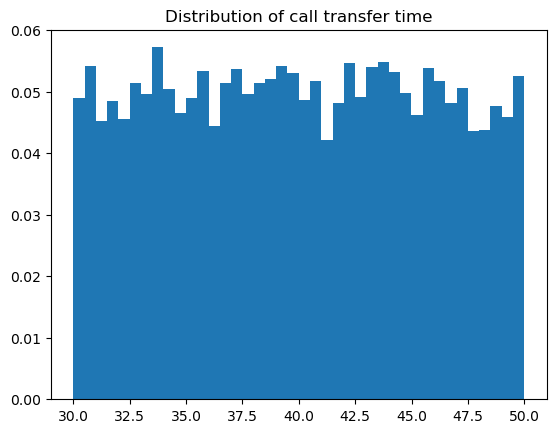

In [9]:
N = 10000

# call time
X1 = np.random.uniform(30, 50, N)  #uniformly distributed

#plot histogram of X1
plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of call transfer time')
plt.show()

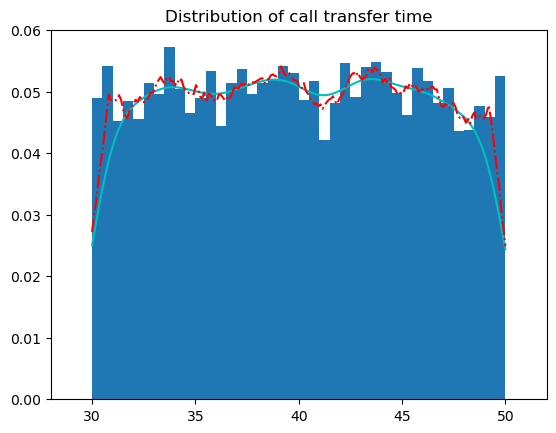

In [10]:
# we know the result is uniformly distributed so the pdf is
x = np.linspace(30,50,200)

#try gaussian kernel
def K(x):
    return 1/(np.sqrt(2*np.pi))*np.exp(-(x)**2/2)

h = 1
Kernel_fun = 0
for i in range(len(X1)):
    Kernel_fun += K((x-X1[i])/h)

#try rectangular
#Rectangular kernel
def Rec(y):
    return np.piecewise(y, [((y < 1) & (y>-1)),((y<=-1) & (y>=1))], [lambda y: 1/2, lambda y: 0])

h1 = 0.8
Kernel_fun_r = 0 
for i in range(len(X1)):
    Kernel_fun_r += Rec((x-X1[i])/h1)

plt.hist(X1,bins = 40, density = True) 
plt.plot(x,1/((len(X1)+1)*h)*Kernel_fun,color = 'c')
plt.plot(x,1/((len(X1)+1)*h1)*Kernel_fun_r,color = 'r',linestyle = '-.')
plt.title('Distribution of call transfer time')
plt.xlim([28,52])
plt.show()

**Analyze and Assess:**

Some questions to start the analysis off:
- does the resulting distribution of the call transfer time make sense given the problem and the assumptions?
- are the distributions used for each variable appropriate?
- are we missing any information?
- how does the choice of kernel change the resulting probability density function?
- is kernel density estimation necessary for this problem?
- what improvements should we make?

### Morning Coffee

Suppose you pick up a coffee on your way to campus each trip.  From your experience, you know the following information: 
- the travel time from your home to the coffee shop is normally distributed with a mean of 15 minutes and variance of 2 minutes$^2$;
- the wait time to receive your coffee is exponentially distributed with a mean of 3 minutes;
- the travel time from the coffee shop to UBC campus is uniformly distributed over 5 to 10 minutes.

Construct a mathematical model to model the total travel time from your home to the coffee shop to UBC campus. Then form the resulting probability distribution function using Kernel Density Estimation. 

Be sure to follow the modelling process in your solution.

**Step 1: State the problem** 

Determine the probability distribution of the transit time to go from home to the coffee shop to UBC campus.

**Step 2: Variables and Parameters**

Random variables
- $X1$: Travel time from home to coffee shop
- $X2$: Wait time for coffee
- $X3$: Travel time from coffee shop to UBC campus
- $Y = X1+X2+X3$: Total travel time

Parameters:
- $\mu_1 = 15$: Average time to go from home to coffee shop
- $\sigma_1^2 = 2$: Variance to go from home to coffee shop
- $\mu_2 = 3$: Average time to wait for coffee
- $\mu_3 = \frac{15}{2}$: Average time to go from coffee shop to UBC campus
- $\sigma_3^2 = \frac{25}{12}$: Variance to go from coffee shop to UBC campus

**Step 3: Assumptions and Variables**
- Random variable $X1$ is normally distributed
- Random variable $X2$ is exponentially distributed
- Random variable $X3$ is uniformly distributed

**Step 4: Build Solutions**

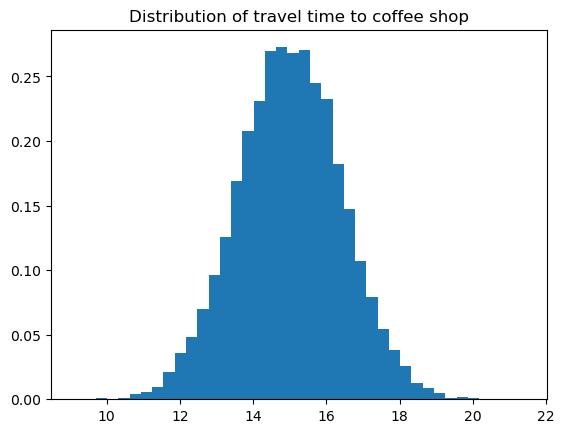

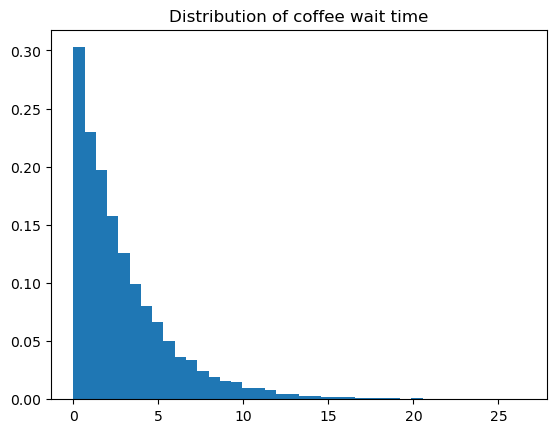

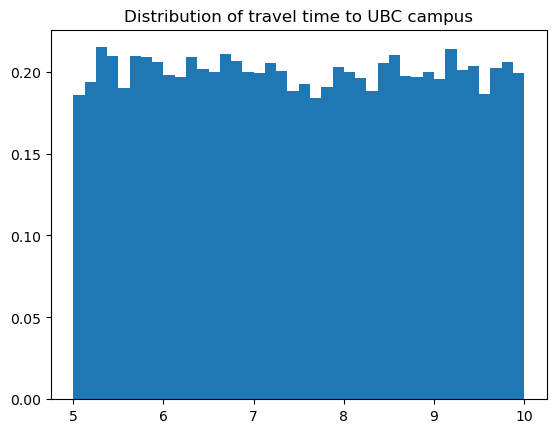

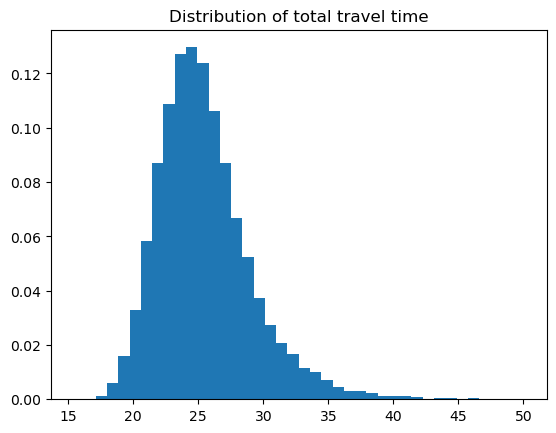

In [11]:
#number of Monte Carlo simulations
N = 20000 

# distributions
X1 = np.random.normal(loc=15, scale=np.sqrt(2), size=N)
X2 = np.random.exponential(scale=3, size=N)
X3 = np.random.uniform(5,10,size=N)

# total time
Y = X1 + X2 + X3

plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of travel time to coffee shop')
plt.show()

plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of coffee wait time')
plt.show()

plt.hist(X3, bins = 40,density=True)
plt.title('Distribution of travel time to UBC campus')
plt.show()

plt.hist(Y,bins = 40, density = True) 
plt.title('Distribution of total travel time')
plt.show()


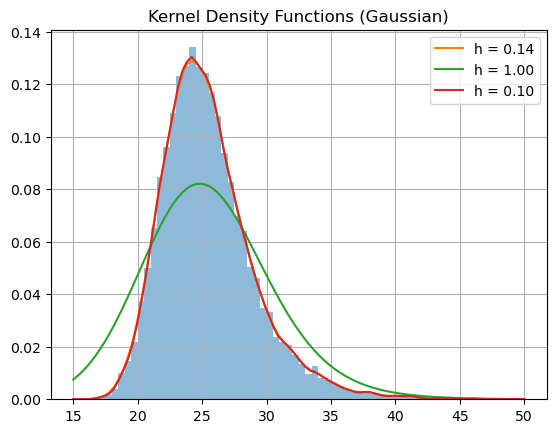

In [12]:
#determine kernel density function
plt.hist(Y,bins=np.arange(15,50,0.5),density=True,alpha=0.5)
kde1 = stats.gaussian_kde(Y)
kde2 = stats.gaussian_kde(Y,bw_method=1)
kde3 = stats.gaussian_kde(Y,bw_method=0.1)

x = np.linspace(15,50,100)
plt.plot(x,kde1(x),label='h = {:.2f}'.format(kde1.factor))
plt.plot(x,kde2(x),label='h = 1.00')
plt.plot(x,kde3(x),label='h = 0.10')
plt.title('Kernel Density Functions (Gaussian)'), plt.legend(), plt.grid(True)
plt.show()

In [13]:
## let's calculate some probabilities:

#probabilty time is less than 20 minutes
prob1 = kde1.integrate_box_1d(0,20)
#probabilty time is less than 25 minutes
prob2 = kde1.integrate_box_1d(0,25)
#probabilty time is less than 30 minutes
prob3 = kde1.integrate_box_1d(0,30)
#probabilty time is less than 45 minutes
prob4 = kde1.integrate_box_1d(0,45)

print(prob1,prob2,prob3,prob4)

0.030311772657880362 0.5017094103388278 0.896980247933962 0.9994706769630296


**Step 5: Analyze and Assess**

From the kernel density estimation of the probability density function and our calculated probabilites, it seems we have a good chance of getting coffee and making it to campus in under $45$ minutes (and even under $30$ minutes!).  

Some other questions to consider for the analysis:
- if we are looking to estimate our total travel time to UBC campus, we may also want to include information about how long it takes us to get to the bus stop from where we live and well as to the building on campus that we are going to
- are the distributions used for each variable appropriate?
- are we missing any information?
- how does the choice of $h$ change the probability density function?

### Insurance Claims

Suppose that insurance claims are processed using the following process:
- the time for a person to submit a claim is normally distributed with a mean of 5 days and variance of 2 days$^2$
- the time to process the claim is gamma distributed with a mean of 10 days and variance of 4 days$^2$
- the time to send the claim from the insurance agency to the claimee is exponentially distributed with a mean of 3 days.

Construct a mathematical model to model the total time to process an insurance claim.  Then form the resulting probability distirbution function using Kernel Density Estimation.

Be sure to follow the modelling process in your solution.

**Step 1: State the problem** 

Determine the probability distribution of the time to process an insurance claim

**Step 2: Variables and Parameters**

Random variables
- $X1$: Time to submit a claim
- $X2$: Time to process a claim
- $X3$: Time to send claim to claimee
- $Y$: Total time


Parameters:
- $\mu_1 = 5$: Average time to submit claim
- $\sigma_1^2 = 2$: Variance to submit claim
- $\mu_2 = 10$: Average time to process claim
- $\sigma_2^2 = 4$: Variance to process claim
- $\mu_3 = 3$: Average time to send to claimee

**Step 3: Assumptions and Variables**
- Random variable $X1$ is normally distributed
- Random variable $X2$ is gamma distributed
- Random variable $X3$ is exponentially distributed
- Random variable $Y = X1+ X2+ X3$ 

**Step 4: Build Solutions**

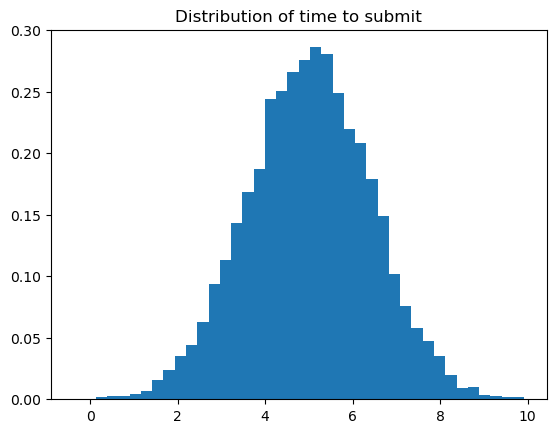

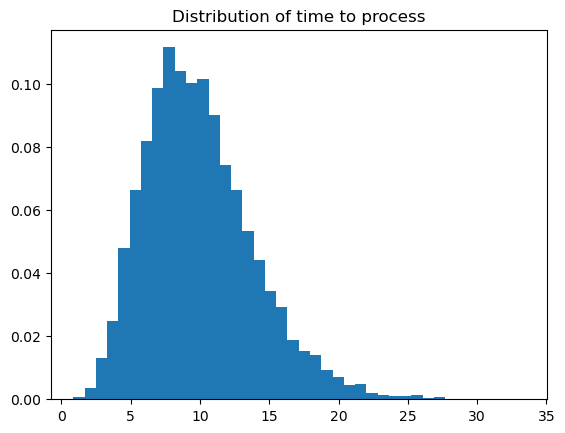

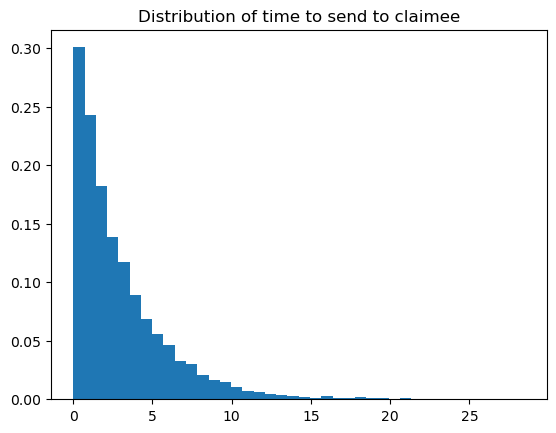

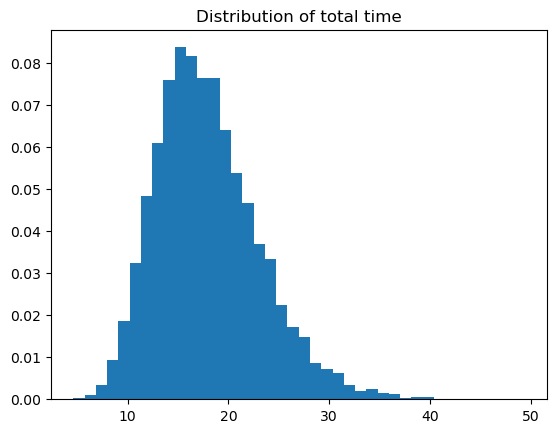

In [14]:
N = 10000

# distributions
X1 = np.random.normal(loc = 5, scale = np.sqrt(2), size = N) #normally distributed 
X2 = np.random.gamma(shape = 10**2/4**2, scale = 4**2/10, size = N) #gamma distributed 
X3 = np.random.exponential(scale=3, size=N)

#total time
Y = X1 + X2 + X3

plt.hist(X1, bins = 40,density = True)
plt.title('Distribution of time to submit')
plt.show()

plt.hist(X2, bins = 40,density=True)
plt.title('Distribution of time to process')
plt.show()

plt.hist(X3, bins = 40,density=True)
plt.title('Distribution of time to send to claimee')
plt.show()

plt.hist(Y,bins = 40, density = True) 
plt.title('Distribution of total time')
plt.show()

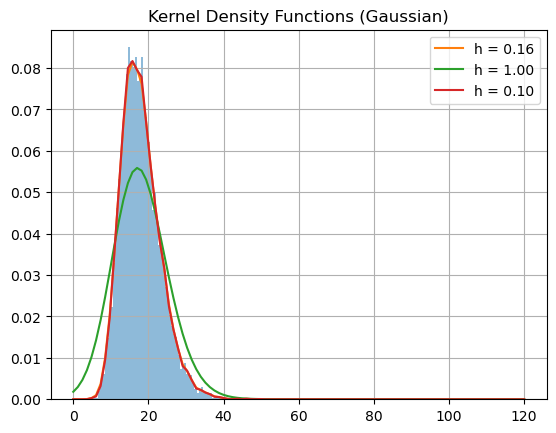

In [15]:
#determine kernel density function
plt.hist(Y,bins=np.arange(0,120,0.5),density=True,alpha=0.5)
kde1 = stats.gaussian_kde(Y)
kde2 = stats.gaussian_kde(Y,bw_method=1)
kde3 = stats.gaussian_kde(Y,bw_method=0.1)

x = np.linspace(0,120,100)
plt.plot(x,kde1(x),label='h = {:.2f}'.format(kde1.factor))
plt.plot(x,kde2(x),label='h = 1.00')
plt.plot(x,kde3(x),label='h = 0.10')
plt.title('Kernel Density Functions (Gaussian)')
plt.legend()
plt.grid(True)
plt.show()

In [16]:
## let's calculate some probabilities:

#probabilty time is less than 30 days
prob1 = kde1.integrate_box_1d(0,30)
#probabilty time is less than 40 days
prob2 = kde1.integrate_box_1d(0,40)
#probabilty time is less than 60 days
prob3 = kde1.integrate_box_1d(0,60)
#probabilty time is less than 80 days
prob4 = kde1.integrate_box_1d(0,80)

print(prob1,prob2,prob3,prob4)

0.9761799227404908 0.9992206157335128 0.9999999999987323 0.9999999999987323


**Step 5: Analyze and Assess**

From the kernel density estimation of the probability density function and our calculated probabilites, it seems we have a good chance of getting the claim processed in $60$ days.  

Some other questions to consider for the analysis:
- are the distributions used for each variable appropriate?
- does the overall distribution seem expected?
- are we missing any information?
- how does the choice of $h$ change the probability density function?
- what other predictions could we now make?